<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None
         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.0

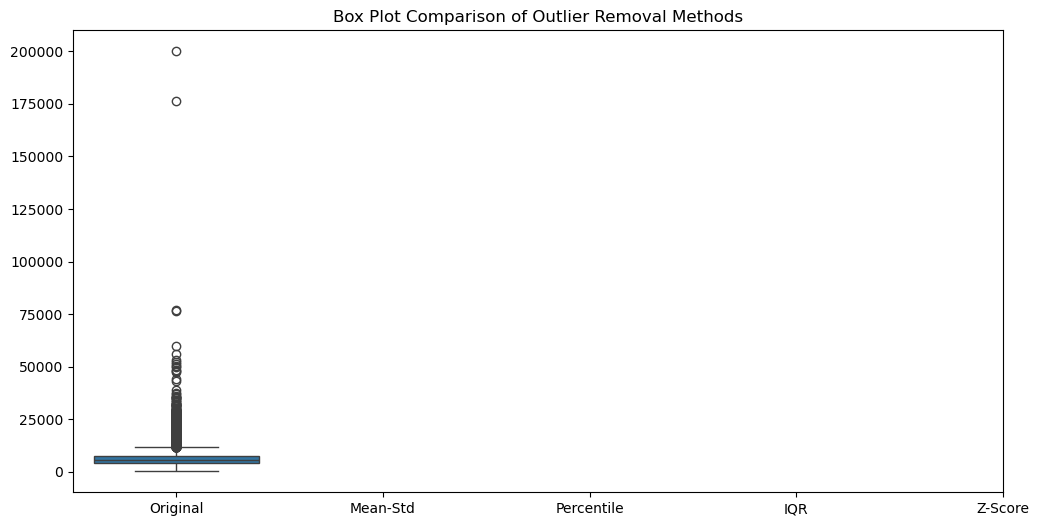

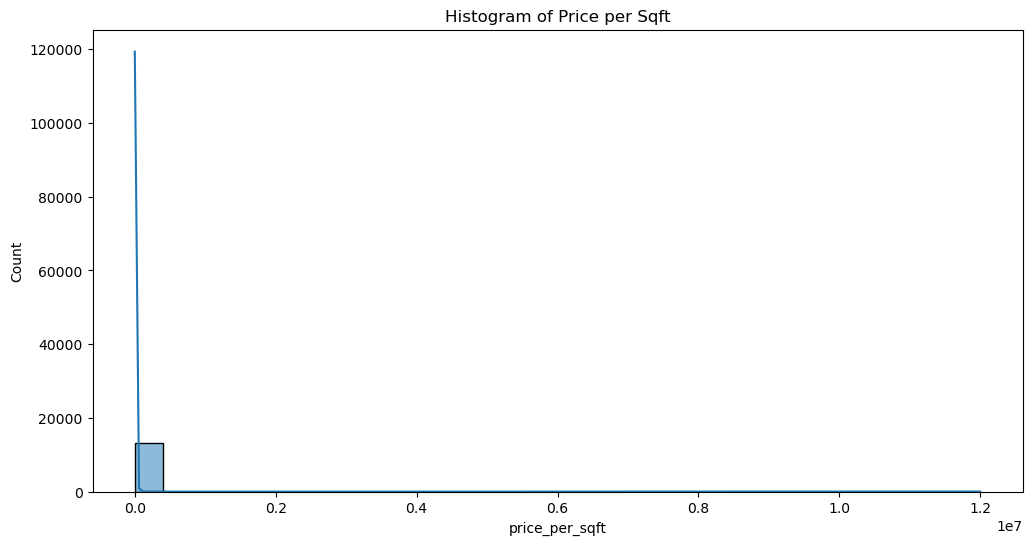

Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


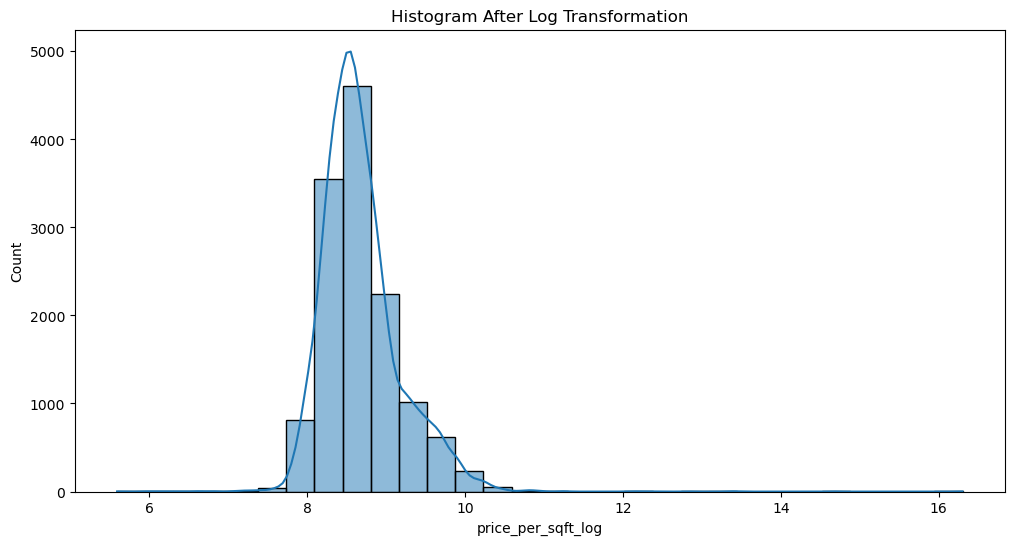

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


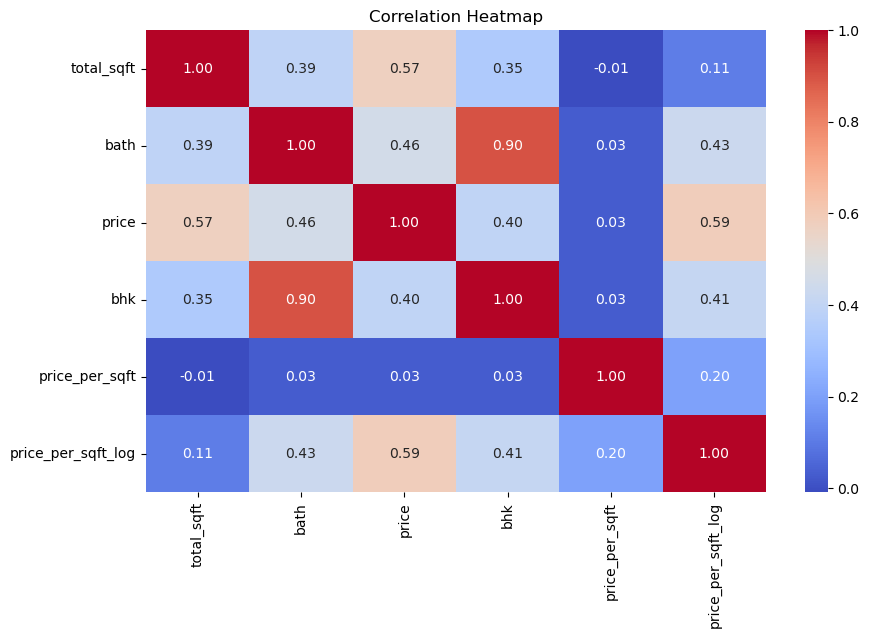

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis, zscore

# Load the dataset
file_path = "house_price.csv"  
df = pd.read_csv(file_path)

# Display basic info & statistics
print(df.info())
print(df.describe())

# Selecting price per sqft column
column = "price_per_sqft" 

# Ensure the column exists and convert to numeric
df[column] = pd.to_numeric(df[column], errors='coerce')

# Handling missing values
df.dropna(subset=[column], inplace=True)

# Q2: Outlier Detection & Removal
# a) Mean & Standard Deviation Method
mean, std = df[column].mean(), df[column].std()
df_no_outliers_std = df[(df[column] > (mean - 3 * std)) & (df[column] < (mean + 3 * std))]

# b) Percentile Method (5th & 95th Percentile)
lower, upper = np.percentile(df[column], [5, 95])
df_no_outliers_percentile = df[(df[column] > lower) & (df[column] < upper)]

# c) IQR Method
Q1, Q3 = np.percentile(df[column], [25, 75])
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
df_no_outliers_iqr = df[(df[column] > lower) & (df[column] < upper)]

# d) Z-Score Method
z_scores = zscore(df[column])
df_no_outliers_z = df[np.abs(z_scores) < 3]

# Q3: Box Plot Comparison (Fixing Data Format)
plt.figure(figsize=(12, 6))
sns.boxplot(data=[df[column].dropna(), 
                  df_no_outliers_std[column].dropna(), 
                  df_no_outliers_percentile[column].dropna(),
                  df_no_outliers_iqr[column].dropna(), 
                  df_no_outliers_z[column].dropna()], showfliers=True)

plt.xticks([0, 1, 2, 3, 4], ['Original', 'Mean-Std', 'Percentile', 'IQR', 'Z-Score'])
plt.title("Box Plot Comparison of Outlier Removal Methods")
plt.show()

# Q4: Histogram & Normality Check
plt.figure(figsize=(12, 6))
sns.histplot(df[column].dropna(), kde=True, bins=30)
plt.title("Histogram of Price per Sqft")
plt.show()

# Skewness & Kurtosis
print("Original Skewness:", skew(df[column].dropna()))
print("Original Kurtosis:", kurtosis(df[column].dropna()))

# Log Transformation (Handle Non-Positive Values)
df = df[df[column] > 0]  # Ensure no zero or negative values
df['price_per_sqft_log'] = np.log1p(df[column])

# After transformation
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft_log'], kde=True, bins=30)
plt.title("Histogram After Log Transformation")
plt.show()
print("Transformed Skewness:", skew(df['price_per_sqft_log'].dropna()))
print("Transformed Kurtosis:", kurtosis(df['price_per_sqft_log'].dropna()))

# Q5: Correlation Heatmap (Fixing Non-Numeric Issue)
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Q6: Scatter Plots (Fixing Non-Numeric Issue)
sns.pairplot(numeric_df)
plt.show()

